# Фильтр Собеля самописный

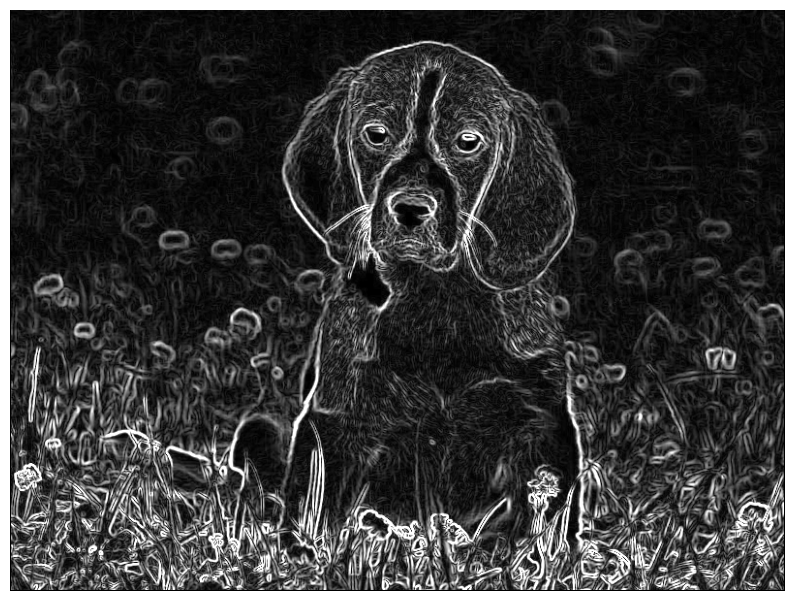

In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

filepath = "./dog.jpg"

def sobel_filter(filepath):
    image = Image.open(filepath)
    width, height = image.size
    image_data = np.array(image.convert('L'))

    kernel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    kernel_y = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])

    sobel_data = np.zeros((height, width), dtype=np.uint8)

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            region = image_data[y - 1:y + 2, x - 1:x + 2]

            pixel_x = np.sum(kernel_x * region)
            pixel_y = np.sum(kernel_y * region)

            magnitude = int(np.sqrt(pixel_x ** 2 + pixel_y ** 2))
            sobel_data[y, x] = min(magnitude, 255)

    return Image.fromarray(sobel_data), image.size


sobel_image, shape = sobel_filter(filepath=filepath)
plt.figure(figsize=(10, 10))
plt.imshow(sobel_image, cmap='gray')
plt.axis('off')  
plt.show()

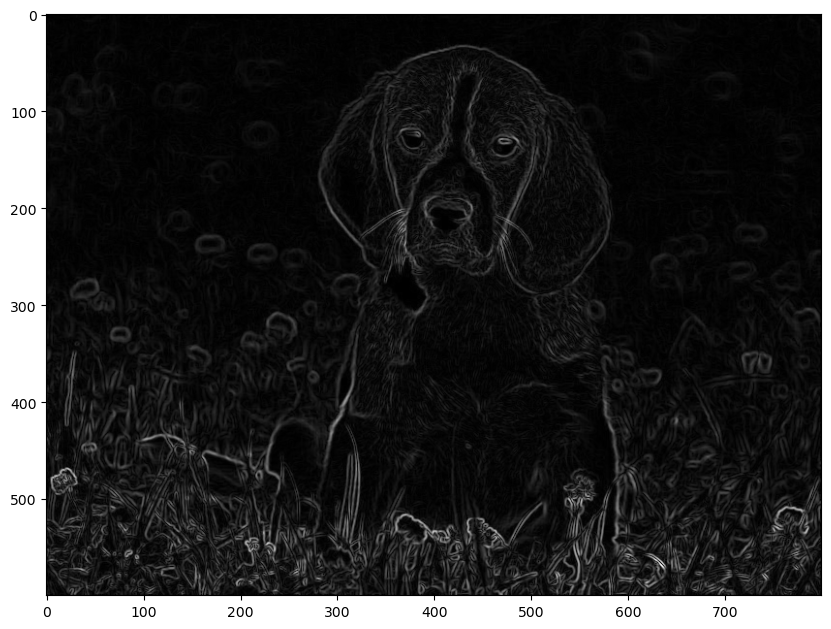

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def cv2sobel(filepath):
    
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    
    sobel_x = cv2.Sobel(image, cv2.CV_64F, dx=1, dy=0, ksize=3)  # По горизонтали
    sobel_y = cv2.Sobel(image, cv2.CV_64F, dx=0, dy=1, ksize=3)  # По вертикали

    
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)


    return sobel_combined, image.shape

plt.figure(figsize=(10, 10))
sobel_combined, shape = cv2sobel(filepath=filepath)
plt.imshow(sobel_combined, cmap='gray')

plt.show()


# Сравнение по времени

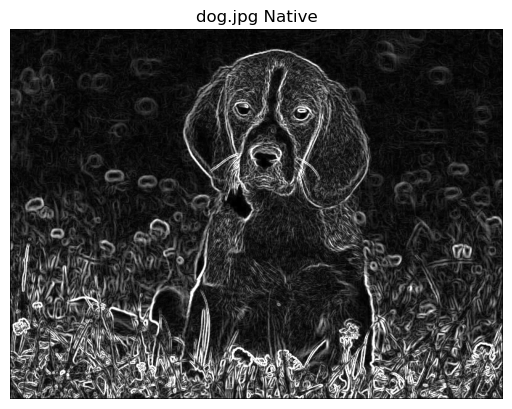

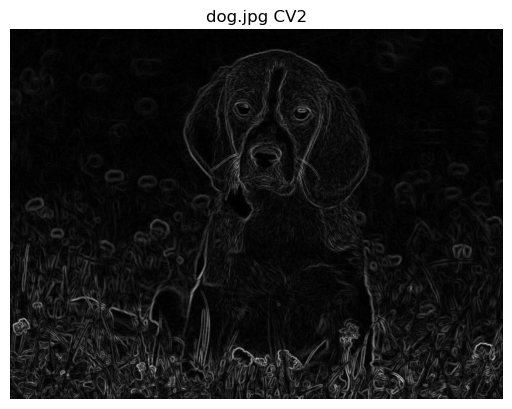

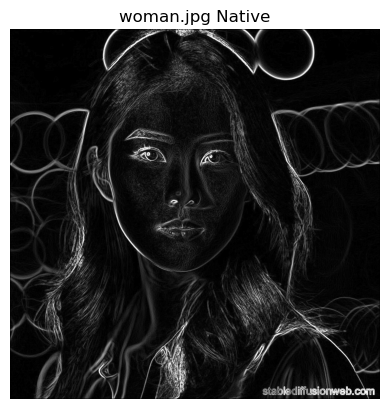

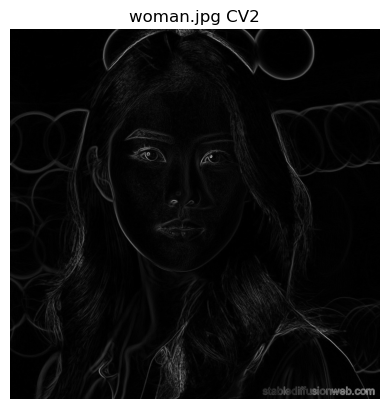

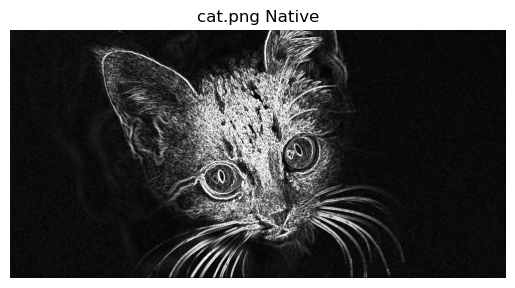

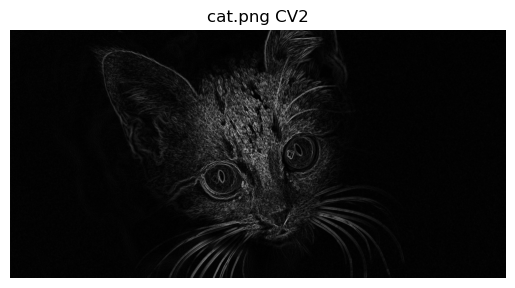

Image: dog.jpg, размер -  (600, 800)
  Самописная реализация: 4.963944 сек
  Реализация OpenCV: 0.007002 сек

Image: woman.jpg, размер -  (1024, 1024)
  Самописная реализация: 10.797495 сек
  Реализация OpenCV: 0.015868 сек

Image: cat.png, размер -  (600, 1200)
  Самописная реализация: 7.364788 сек
  Реализация OpenCV: 0.018543 сек



In [17]:
import time


image_paths = ["dog.jpg", "woman.jpg", "cat.png"] 
results = []

for img_path in image_paths:
    
    start_time = time.time()
    img, shape = sobel_filter(img_path)
    custom_duration = time.time() - start_time

    plt.imshow(img, cmap='gray')
    plt.title(label=img_path + " Native")
    plt.axis('off')
    plt.show()

    start_time = time.time()
    img, shape = cv2sobel(img_path)
    cv2_duration = time.time() - start_time

    plt.imshow(img, cmap='gray')
    plt.title(label=img_path + " CV2")
    plt.axis('off')
    plt.show()
    
    results.append((img_path, custom_duration, cv2_duration, shape))



for img_path, custom_time, cv2_time, shape in results:
    print(f"Image: {img_path}, размер -  {shape}")
    print(f"  Самописная реализация: {custom_time:.6f} сек")
    print(f"  Реализация OpenCV: {cv2_time:.6f} сек")
    print()

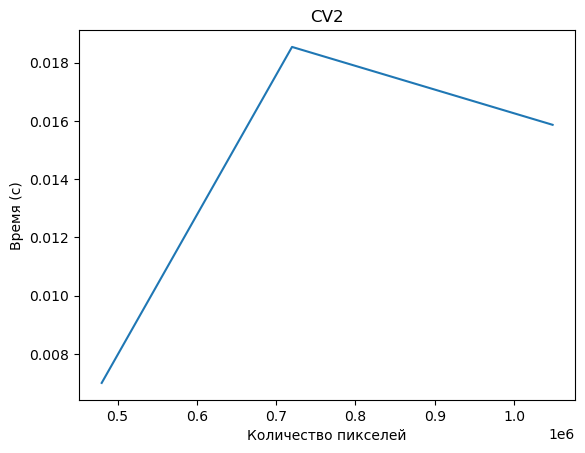

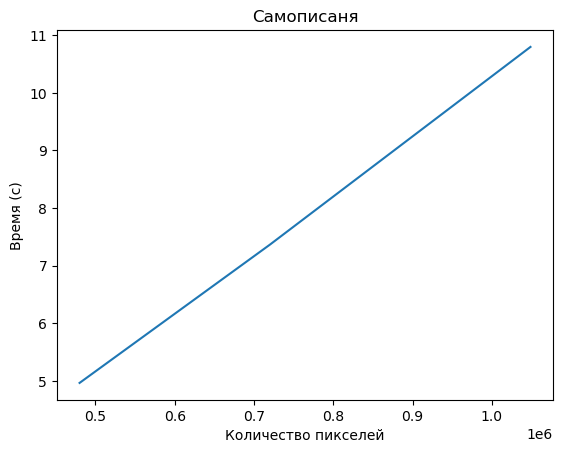

In [25]:
results = sorted(results, key = lambda x: np.dot(*x[-1]))

plt.plot([np.dot(*i[-1]) for i in results], [i[-2] for i in results])
plt.title(label="CV2")
plt.xlabel("Количество пикселей")
plt.ylabel("Время (с)")
plt.show()
plt.plot([np.dot(*i[-1]) for i in results], [i[-3] for i in results])
plt.title(label="Самописаня")
plt.xlabel("Количество пикселей")
plt.ylabel("Время (с)")
plt.show()